## Task 3: Data Visualization – IPL Batting Performance

In [3]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the IPL batting dataset
df = pd.read_csv('/kaggle/input/cricket-analysis-dataset/df_batting.csv')

# Clean column names: strip spaces and lowercase
df.columns = df.columns.str.strip().str.lower()

# Convert columns to correct data types
df['runs'] = pd.to_numeric(df['runs'], errors='coerce')
df['balls'] = pd.to_numeric(df['balls'], errors='coerce')
df['4s'] = pd.to_numeric(df['4s'], errors='coerce')
df['6s'] = pd.to_numeric(df['6s'], errors='coerce')

# Preview the dataset
df.head()


,match,teaminnings,battingpos,batsmanname,runs,balls,4s,6s,sr,out/not_out,match_id
0,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,3,6,0,0,50.00,out,T20I # 1823
1,Namibia Vs Sri Lanka,Namibia,2,Divan la Cock,9,9,1,0,100.00,out,T20I # 1823
2,Namibia Vs Sri Lanka,Namibia,3,Jan Nicol Loftie-Eaton,20,12,1,2,166.66,out,T20I # 1823
3,Namibia Vs Sri Lanka,Namibia,4,Stephan Baard,26,24,2,0,108.33,out,T20I # 1823
4,Namibia Vs Sri Lanka,Namibia,5,Gerhard Erasmus(c),20,24,0,0,83.33,out,T20I # 1823


# Visual Questions to Explore
Who are the top scorers?

How does batting position affect performance?

What's the distribution of runs and strike rate?

How much do boundaries contribute to total runs?

Which players are the most aggressive hitters?

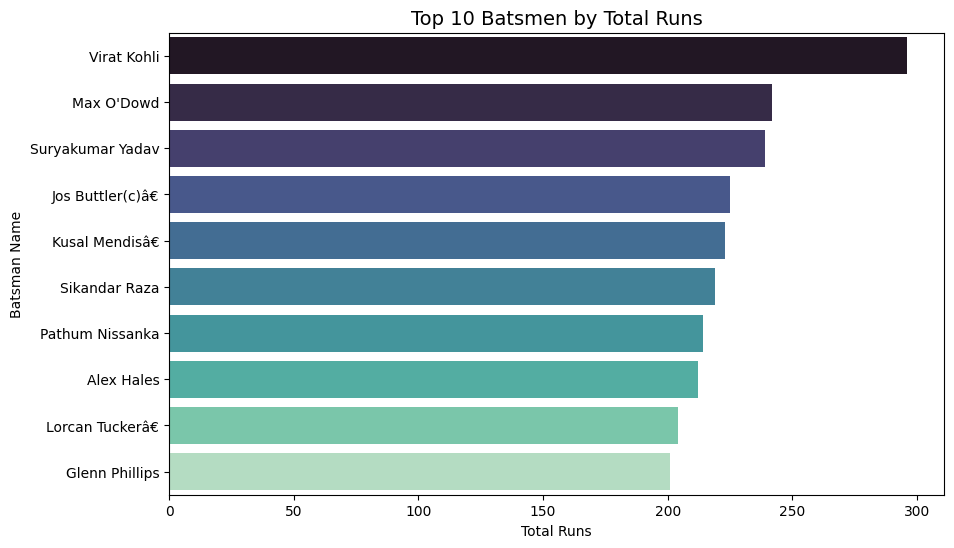

In [4]:
top_scorers = df.groupby('batsmanname')['runs'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_scorers.values, y=top_scorers.index, palette='mako')
plt.title('Top 10 Batsmen by Total Runs', fontsize=14)
plt.xlabel('Total Runs')
plt.ylabel('Batsman Name')
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


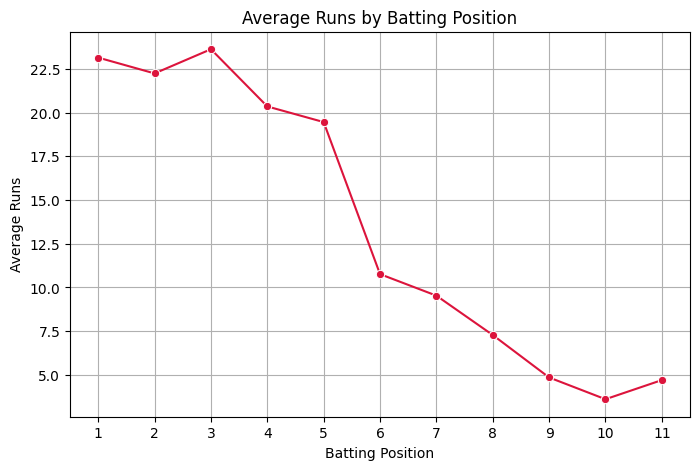

In [5]:
avg_runs_pos = df.groupby('battingpos')['runs'].mean().sort_index()

plt.figure(figsize=(8,5))
sns.lineplot(x=avg_runs_pos.index, y=avg_runs_pos.values, marker='o', color='crimson')
plt.title('Average Runs by Batting Position')
plt.xlabel('Batting Position')
plt.ylabel('Average Runs')
plt.xticks(range(1, 12))
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


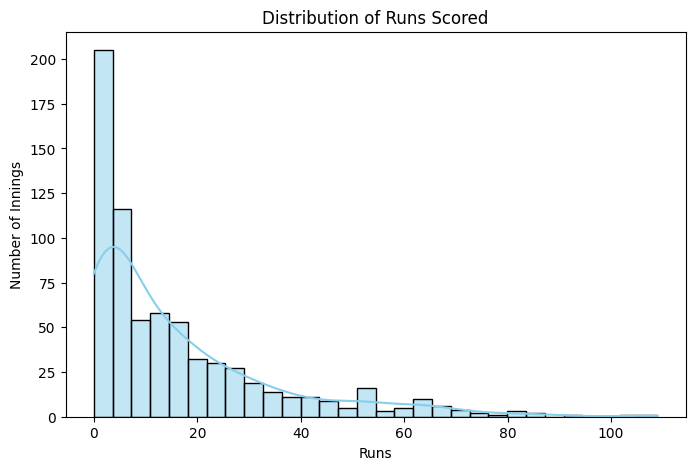

In [6]:
plt.figure(figsize=(8,5))
sns.histplot(df['runs'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Runs Scored')
plt.xlabel('Runs')
plt.ylabel('Number of Innings')
plt.show()


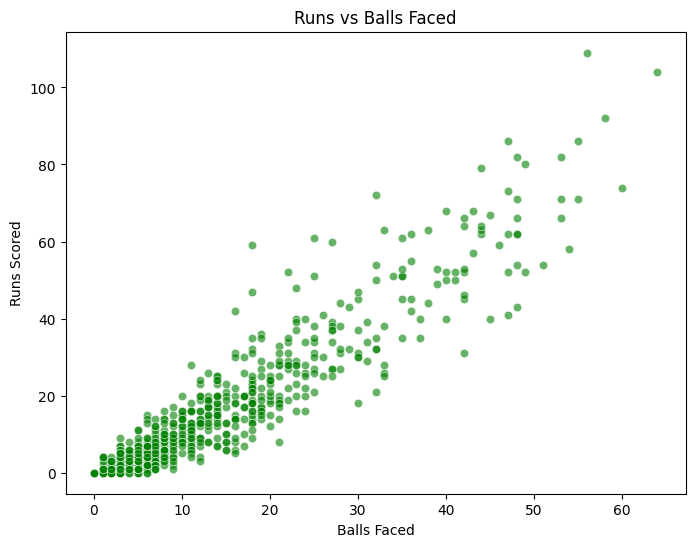

In [7]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='balls', y='runs', alpha=0.6, color='green')
plt.title('Runs vs Balls Faced')
plt.xlabel('Balls Faced')
plt.ylabel('Runs Scored')
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


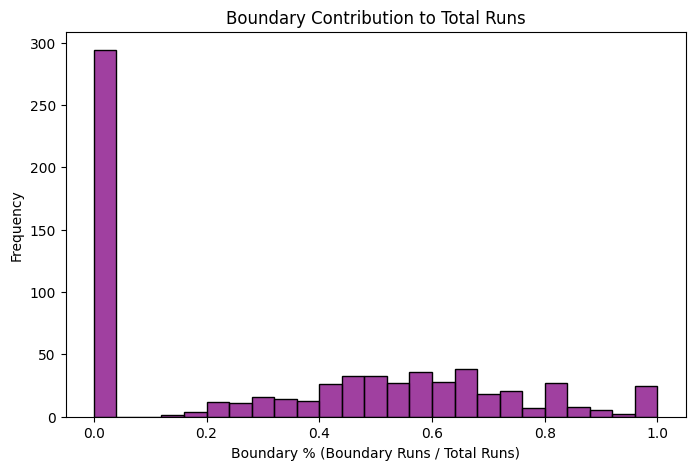

In [8]:
df['boundary_runs'] = df['4s']*4 + df['6s']*6
df['boundary_pct'] = df['boundary_runs'] / df['runs']
df['boundary_pct'] = df['boundary_pct'].replace([float('inf'), -float('inf')], 0).fillna(0)

plt.figure(figsize=(8,5))
sns.histplot(df['boundary_pct'], bins=25, color='purple')
plt.title('Boundary Contribution to Total Runs')
plt.xlabel('Boundary % (Boundary Runs / Total Runs)')
plt.ylabel('Frequency')
plt.show()


# Key Insights
Top run scorers include consistent performers across seasons.

Players at batting positions 1–3 generally score more runs on average.

Boundaries (4s and 6s) contribute significantly to scoring; some players score over 80% of runs in boundaries.

Strong linear relationship observed between balls faced and runs scored.

